In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

mnist = tf.keras.datasets.mnist
(xtrain_1,ytrain),(xtest_1,ytest) = mnist.load_data()

# flatten the input and normalize
xtrain = xtrain_1.reshape(xtrain_1.shape[0],28*28)
xtest = xtest_1.reshape(xtest_1.shape[0],28*28)
xtrain = tf.keras.utils.normalize(xtrain,axis=1)
xtest = tf.keras.utils.normalize(xtest,axis=1)

# convert the labels to one-shot
from keras.utils import to_categorical
ytrain = to_categorical(ytrain)
ytest = to_categorical(ytest)


In [4]:
# print(xtrain.shape)
# plt.imshow(xtrain[0])
# plt.show

# convert the labels to one-shot
from keras.utils import to_categorical
ytrain = to_categorical(ytrain)
ytest = to_categorical(ytest)

Using TensorFlow backend.


In [6]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(512, input_shape=(784,), activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation = tf.nn.softmax))

# model.compile(optimizer = 'adam', loss= 'categorical_crossentropy', metrics = ['accuracy'])

model.compile(optimizer=tf.keras.optimizers.SGD(lr=1e-2, decay=1e-6,momentum=0.9,nesterov=True),
             loss = 'categorical_crossentropy', metrics=['accuracy'])


history = model.fit(xtrain, ytrain, epochs=3, batch_size = 256, validation_data=(xtest, ytest))

Train on 60000 samples, validate on 10000 samples
Epoch 1/3
60000/60000 [==============================] - 5s 91us/sample - loss: 1.9388 - acc: 0.4872 - val_loss: 1.2477 - val_acc: 0.7499
Epoch 2/3
60000/60000 [==============================] - 5s 82us/sample - loss: 0.8018 - acc: 0.8093 - val_loss: 0.5535 - val_acc: 0.8512
Epoch 3/3
60000/60000 [==============================] - 5s 82us/sample - loss: 0.4909 - acc: 0.8637 - val_loss: 0.4191 - val_acc: 0.8831


In [7]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_7 (Dense)              (None, 128)               65664     
_________________________________________________________________
dense_8 (Dense)              (None, 10)                1290      
Total params: 468,874
Trainable params: 468,874
Non-trainable params: 0
_________________________________________________________________


In [8]:
test_loss, test_acc = model.evaluate(xtest,ytest)
print(test_loss, test_acc)

10000/10000 [==============================] - 1s 89us/sample - loss: 0.4191 - acc: 0.8831
0.4191485638380051 0.8831


Text(0.5, 1.0, 'Accuracy Curves')

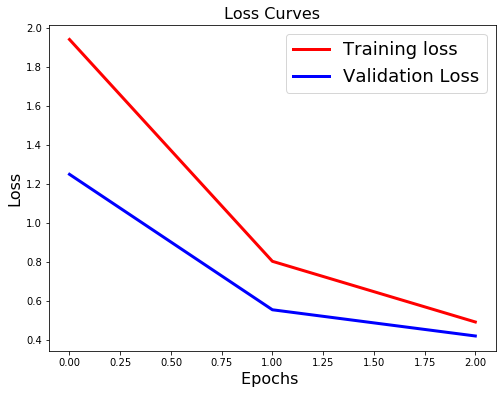

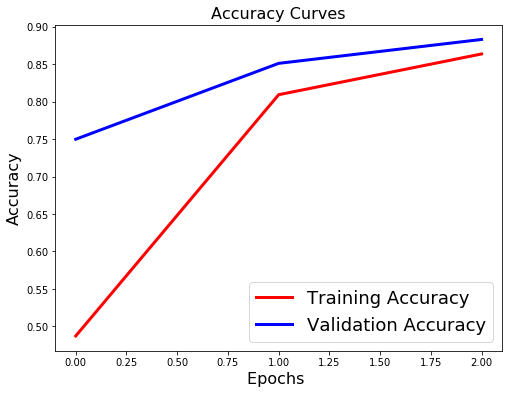

In [9]:
#Plot the Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)
 
#Plot the Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['acc'],'r',linewidth=3.0)
plt.plot(history.history['val_acc'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

In [10]:
model.save('example_mnist_suka2.h5')

In [11]:
new_model = tf.keras.models.load_model('example_mnist_suka2.h5')

In [12]:
predictions = new_model.predict(xtest)

In [13]:
print(predictions[0])

[8.8872315e-05 2.4555416e-07 9.2371656e-06 3.6632069e-04 7.7764416e-06
 4.1470616e-05 1.0161613e-08 9.9502581e-01 1.5437994e-05 4.4447477e-03]


In [14]:
import numpy as np

print(np.argmax(predictions[0]))

7


<function matplotlib.pyplot.show(*args, **kw)>

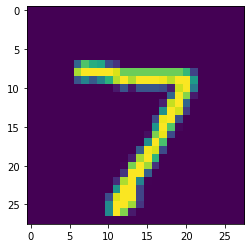

In [15]:
plt.imshow(xtest_1[0])
plt.show

In [20]:
import cv2
# from PIL import Image
video = cv2.VideoCapture(1)

while True:

    __,frame = video.read()
       
    # convert the captured frame into grayscale
    im = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    im = cv2.resize(im,(28,28))
    im = im.reshape(28*28)
    im = tf.keras.utils.normalize(im)
    img_array = np.array(im)
    predictions = new_model.predict(img_array)
    label = np.argmax(predictions)
    # Display the predictions
    cv2.putText(frame, "Label: {}".format(label), (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)
    cv2.imshow("Classification", frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
          break

video.release()
cv2.destroyAllWindows() 
    